<a href="https://colab.research.google.com/github/hkmamike/market-encoder/blob/main/fnspid_siamese_keep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Install packages

In [1]:
!pip install awswrangler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.6/380.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 153.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.8 MB/s eta 0:00:00


## Connect AWS

In [2]:
from getpass import getpass
from google.colab import userdata

# --- AWS Authentication for Colab ---
aws_access_key_id = getpass('Enter AWS Access Key ID: ')
aws_secret_access_key = getpass('Enter AWS Secret Access Key: ')

Enter AWS Access Key ID: ··········
Enter AWS Secret Access Key: ··········


# Data prep

In [3]:
import pandas as pd
import os

SHOULD_SKIP_STEP = False

# Check if df_final exists as a local variable
if 'df_final' not in locals() and 'df_final' not in globals():
    print("'df_final' is not found in local or global scope.")
    # Check if df_final.csv exists on disk
    if os.path.exists('df_final.csv'):
        print("Loading 'df_final' from 'df_final.csv'...")
        df_final = pd.read_csv('df_final.csv')
        SHOULD_SKIP_STEP = True
        print("'df_final' loaded successfully from CSV.")
        print(df_final.head())
    else:
        print("'df_final.csv' not found on disk. 'df_final' variable is not available.")
else:
    SHOULD_SKIP_STEP = True
    print("'df_final' is already available in the current environment.")
    print(df_final.head())

'df_final' is not found in local or global scope.
'df_final.csv' not found on disk. 'df_final' variable is not available.


## Load price data and news summaries from AWS

In [4]:
import awswrangler as wr
import boto3
import pandas as pd
import os

AWS_REGION = 'us-east-2'
S3_STAGING_DIR = 's3://cs230-market-data-2025/athena-query-results/'
ATHENA_DB = 'cs230_finance_data'
SQL_QUERY_PRICES = "SELECT * FROM fnspid_siamese_prices_distinct"
SQL_QUERY_NEWS = "SELECT * FROM fnspid_siamese_news_distinct"

if not SHOULD_SKIP_STEP:
    # --- Conditional Loading for df_prices_raw ---
    if 'df_prices_raw' not in locals() and 'df_prices_raw' not in globals():
        if os.path.exists('df_prices_raw.csv'):
            print("Loading 'df_prices_raw' from 'df_prices_raw.csv'...")
            df_prices_raw = pd.read_csv('df_prices_raw.csv')
            print("'df_prices_raw' loaded successfully from CSV.")
        else:
            print("'df_prices_raw' not found locally. Loading from AWS...")
            try:
                # Create a boto3 session with the provided credentials
                session = boto3.Session(
                    aws_access_key_id=aws_access_key_id,
                    aws_secret_access_key=aws_secret_access_key,
                    region_name=AWS_REGION
                )
                print("Loading prices (single-threaded to save RAM)...")
                df_prices_raw = wr.athena.read_sql_query(
                    sql=SQL_QUERY_PRICES,
                    database=ATHENA_DB,
                    s3_output=S3_STAGING_DIR,
                    boto3_session=session,
                    use_threads=False
                )
                print("\nQuery successful! Price data loaded into DataFrame.")
                df_prices_raw.to_csv('df_prices_raw.csv', index=False)
            except Exception as e:
                print(f"\nAn error occurred loading df_prices_raw from AWS:")
                print(e)
    else:
        print("'df_prices_raw' is already available in the current environment.")

    print(f"df_prices_raw.shape: {df_prices_raw.shape}")
    print(df_prices_raw.head())

    # --- Conditional Loading for df_news_raw ---
    if 'df_news_raw' not in locals() and 'df_news_raw' not in globals():
        if os.path.exists('df_news_raw.csv'):
            print("Loading 'df_news_raw' from 'df_news_raw.csv'...")
            df_news_raw = pd.read_csv('df_news_raw.csv')
            print("'df_news_raw' loaded successfully from CSV.")
        else:
            print("'df_news_raw' not found locally. Loading from AWS...")
            try:
                session = boto3.Session(
                    aws_access_key_id=aws_access_key_id,
                    aws_secret_access_key=aws_secret_access_key,
                    region_name=AWS_REGION
                )
                print("Loading news (single-threaded to save RAM)...")
                df_news_raw = wr.athena.read_sql_query(
                    sql=SQL_QUERY_NEWS,
                    database=ATHENA_DB,
                    s3_output=S3_STAGING_DIR,
                    boto3_session=session,
                    use_threads=False
                )
                print("\nQuery successful! News data loaded into DataFrame.")
                df_news_raw.to_csv('df_news_raw.csv', index=False)
            except Exception as e:
                print(f"\nAn error occurred loading df_news_raw from AWS:")
                print(e)
    else:
        print("'df_news_raw' is already available in the current environment.")

    print(f"df_news_raw.shape: {df_news_raw.shape}")
    print(df_news_raw.head())
else:
  print("Skipping extraction because df_final already exists.")

'df_prices_raw' not found locally. Loading from AWS...
Loading prices (single-threaded to save RAM)...

Query successful! Price data loaded into DataFrame.
df_prices_raw.shape: (2114017, 4)
         date stock_symbol        open       close
0  2010-08-24          cvs   28.280001   23.065432
1  2017-01-23           ar   25.680000   25.138981
2  2021-05-21          egp  159.039993  144.346893
3  2021-12-27          bap  122.919998  121.821030
4  2018-12-04          ale   82.820000   77.246353
'df_news_raw' not found locally. Loading from AWS...
Loading news (single-threaded to save RAM)...

Query successful! News data loaded into DataFrame.


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os

if not SHOULD_SKIP_STEP:
  # --- Conditional Loading for df_prices ---
  if 'df_prices' not in locals() and 'df_prices' not in globals():
      if os.path.exists('df_prices.csv'):
          print("Loading 'df_prices' from 'df_prices.csv'...")
          df_prices = pd.read_csv('df_prices.csv')
          print("'df_prices' loaded successfully from CSV.")
      else:
          print("'df_prices' not found locally. Processing from df_prices_raw...")
          df_prices = df_prices_raw.copy()

          # Normalize 'date' column values
          if 'date' in df_prices.columns:
              df_prices['date'] = pd.to_datetime(df_prices['date']).dt.normalize()

          # Convert price and volume columns to numeric types
          numeric_cols = ['open', 'close']
          for col in numeric_cols:
              if col in df_prices.columns:
                  df_prices[col] = pd.to_numeric(df_prices[col], errors='coerce')

          print("'df_prices' processed from df_prices_raw.")
  else:
      print("'df_prices' is already available in the current environment.")

  # --- Conditional Loading for df_news ---
  if 'df_news' not in locals() and 'df_news' not in globals():
      if os.path.exists('df_news.csv'):
          print("Loading 'df_news' from 'df_news.csv'...")
          df_news = pd.read_csv('df_news.csv')
          print("'df_news' loaded successfully from CSV.")
      else:
          print("'df_news' not found locally. Processing from df_news_raw...")
          df_news = df_news_raw.copy()

          # Handle date/timestamp for news
          if 'date' in df_news.columns:
              df_news['date'] = pd.to_datetime(df_news['date']).dt.normalize()

          print("'df_news' processed from df_news_raw.")
  else:
      print("'df_news' is already available in the current environment.")

# Display the first 5 rows
print(f"\nFirst 5 rows of df_prices:\n{df_prices.head()}")
print(f"\nFirst 5 rows of df_news:\n{df_news.head()}")

## Filter stock price table to rows with corresponding news summaries

In [ ]:
if not SHOULD_SKIP_STEP:
  # Capture initial counts
  initial_prices_count = len(df_prices)
  initial_news_count = len(df_news)

  # Ensure date columns are normalized to midnight (00:00:00) for accurate matching
  df_prices['date'] = pd.to_datetime(df_prices['date']).dt.normalize()
  df_news['date'] = pd.to_datetime(df_news['date']).dt.normalize()

  # 1. Identify common keys (intersection of date & symbol)
  # We find keys that exist in BOTH cleaned dataframes.
  common_keys = pd.merge(
      df_prices[['stock_symbol', 'date']],
      df_news[['stock_symbol', 'date']].drop_duplicates(),
      on=['stock_symbol', 'date'],
      how='inner'
  )

  # 3. Filter both DataFrames to keep only the intersection
  df_prices = pd.merge(df_prices, common_keys, on=['stock_symbol', 'date'], how='inner')
  df_news = pd.merge(df_news, common_keys, on=['stock_symbol', 'date'], how='inner')

  df_prices.to_csv('df_prices.csv', index=False)
  df_news.to_csv('df_news.csv', index=False)

  # Calculate dropped due to intersection filter
  print(f"Rows dropped from df_prices due to mismatching dates/symbols: {initial_prices_count - len(df_prices)}")
  print(f"Rows dropped from df_news due to mismatching dates/symbols: {initial_news_count - len(df_news)}")

  print(f"Filtered df_prices Shape: {df_prices.shape}")
  print(f"Filtered df_news Shape: {df_news.shape}")

  # Verification: Check if we have multiple news items per day
  max_news_count = df_news.groupby(['stock_symbol', 'date']).size().max()
  print(f"Max news articles for a single symbol/date: {max_news_count}")

print(df_prices.head())

## Tabulate price data in a convenient format



In [ ]:
import numpy as np
import pandas as pd

if not SHOULD_SKIP_STEP:
  # 1. Sort the data by symbol and date to ensure correct ordering
  df_sorted = df_prices.sort_values(by=['stock_symbol', 'date']).copy()

  # 2. Calculate close_t_minus_1
  # We group by symbol, shift(1) to get previous row, and ffill to find closest populated if immediate previous is null
  df_sorted['close_t_minus_1'] = df_sorted.groupby('stock_symbol')['close'].transform(lambda x: x.shift(1).ffill())

  # 3. Calculate open_t_plus_1
  # We group by symbol, shift(1) to get next row, and bfill to find closest populated if immediate next is null
  df_sorted['open_t_plus_1'] = df_sorted.groupby('stock_symbol')['open'].transform(lambda x: x.shift(-1).bfill())

  # 4. Calculate y
  # Formula: (open_t_plus_1 - close_t_minus_1) / close_t_minus_1
  df_sorted['y'] = (df_sorted['open_t_plus_1'] - df_sorted['close_t_minus_1']) / df_sorted['close_t_minus_1']

  # 5. Select specific columns
  df_final = df_sorted[['date', 'stock_symbol', 'close_t_minus_1', 'open_t_plus_1', 'y']].copy()

  # 6. Drop rows with NaNs
  # This effectively removes the first and last row for each stock_symbol (n-2 rows)
  df_final = df_final.dropna()

  # 7. Remove infinite values caused by division by zero
  # If close_t_minus_1 is 0, the result of division is inf or -inf.
  # We replace them with NaN and drop those rows.
  df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna(subset=['y'])

  # 8. Reset the index
  df_final = df_final.reset_index(drop=True)

# Display the result
print(f"Original row count: {len(df_prices)}")
print(f"New table row count: {len(df_final)}")
print(df_final.head())

### Price data summary statistics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary Statistics
print("Summary Statistics for 'y':")
print(df_final['y'].describe())

# 2. Visualization
plt.figure(figsize=(15, 5))

# Plot 1: Boxplot (shows outliers clearly)
plt.subplot(1, 3, 1)
sns.boxplot(x=df_final['y'])
plt.title('Boxplot of y')

# Plot 2: Histogram of entire range (likely skewed by outliers)
plt.subplot(1, 3, 2)
plt.hist(df_final['y'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram (Full Range)')
plt.xlabel('y')

# Plot 3: Histogram focused on the core distribution (1st to 99th percentile)
# "Accounting for outliers" by showing the relevant distribution
p01 = df_final['y'].quantile(0.01)
p99 = df_final['y'].quantile(0.99)
core_data = df_final[(df_final['y'] >= p01) & (df_final['y'] <= p99)]['y']

plt.subplot(1, 3, 3)
plt.hist(core_data, bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram (1st-99th Percentile)')
plt.xlabel('y')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

if not SHOULD_SKIP_STEP:
  # Outlier detection

  # Define the target outlier rate (e.g., 0.05 for 5%)
  # Adjust this number (e.g., 0.01 for 1% or 0.10 for 10%) based on your expectation.
  target_contamination = 0.05

  # Prepare the data for scikit-learn (needs to be 2D, even for a single column)
  X = df_final['y'].values.reshape(-1, 1)

  # Initialize the Isolation Forest model
  # Setting contamination ensures the model will predict approximately this percentage as outliers.
  outlier_model = IsolationForest(contamination=target_contamination, random_state=42)

  # Train the model and predict the outliers
  # Prediction output: -1 for outliers, 1 for inliers
  df_final['is_outlier'] = outlier_model.fit_predict(X)

  # Select the actual outliers
  outliers_iforest = df_final[df_final['is_outlier'] == -1]

  # Calculate the resulting percentage (will be very close to 5%)
  outlier_percentage = len(outliers_iforest) / len(df_final['y']) * 100

print(f"✅ Outlier Percentage using Isolation Forest: {outlier_percentage:.2f}%")
print(f"Total outliers identified: {len(outliers_iforest)}")

In [ ]:
import pandas as pd

if not SHOULD_SKIP_STEP:
  # 1. Merge df_news and df_final on 'stock_symbol' and 'date'
  # We use inner join to ensure we have both news and price targets for each record
  df_merged = pd.merge(df_news, df_final, on=['stock_symbol', 'date'], how='inner')

  print(f"Merged shape: {df_merged.shape}")

  # 2. Filter to keep only inliers (where is_outlier is 1)
  df_inliers = df_merged[df_merged['is_outlier'] == 1].copy()
  print(f"Shape after removing isolation forest outliers: {df_inliers.shape}")

  # 3. Calculate 1st and 99th percentiles of y
  q1 = df_inliers['y'].quantile(0.01)
  q99 = df_inliers['y'].quantile(0.99)

  print(f"1st Percentile of y: {q1}")
  print(f"99th Percentile of y: {q99}")

  # 4. Filter rows where y is between 1st and 99th percentiles (inclusive)
  df_filtered = df_inliers[(df_inliers['y'] >= q1) & (df_inliers['y'] <= q99)].copy()
  print(f"Shape after percentile filtering: {df_filtered.shape}")

  # Save table to CSV
  df_filtered.to_csv('df_filtered.csv', index=False)

  print("DataFrame saved to CSV: df_filtered.csv")

## Prepare and filter data


In [5]:
import pandas as pd
import os

if 'df_sampled' not in locals() and 'df_sampled' not in globals():
  if os.path.exists('df_sampled.csv'):
    df_sampled = pd.read_csv('df_sampled.csv')
    print("Loaded 'df_sampled' from 'df_sampled.csv'.")
  else:
    # Randomly sample 15,000 rows
    TARGET_SAMPLE_SIZE = 15000 # Set sample size to 15,000
    if len(df_filtered) >= TARGET_SAMPLE_SIZE:
        df_sampled = df_filtered.sample(n=TARGET_SAMPLE_SIZE, random_state=42)
    else:
        print(f"Warning: Fewer than {TARGET_SAMPLE_SIZE} rows available. Taking all available rows.")
        df_sampled = df_filtered.copy()

    # Reset the index
    df_sampled = df_sampled.reset_index(drop=True)
    df_sampled.to_csv('df_sampled.csv', index=False)
else:
  print(f"'df_sampled' is already available in the current environment.")

# Display final info
print(f"Final sampled shape: {df_sampled.shape}")
print(df_sampled.head())

Loaded 'df_sampled' from 'df_sampled.csv'.
Final sampled shape: (15000, 8)
         date stock_symbol                                        lsa_summary  \
0  2018-03-06          ago  Assured Guaranty US Holdings Inc., a subsidiar...   
1  2021-08-26          viv  By Svea Herbst-Bayliss, Anirban Sen and Sierra...   
2  2023-11-29         helx  Technically, the asset’s momentum is underpinn...   
3  2023-10-09         ucib  By Foo Yun Chee BRUSSELS, Oct 9 (Reuters) - EU...   
4  2017-08-10          eem  The Emerging Markets ETF (NYSEARCA: EEM - Free...   

   close_t_minus_1  open_t_plus_1         y  is_outlier  bin  
0        35.369999      35.509998  0.003958           1    0  
1         8.370000       8.440000  0.008363           1    1  
2        27.579000      28.010000  0.015628           1    1  
3        24.629999      24.840000  0.008526           1    1  
4        43.860001      42.869999 -0.022572           1    0  


## Extract FinBERT embeddings

In [6]:
import torch
from transformers import BertTokenizer, BertModel

if not os.path.exists('embeddings.pt'):
  # Check if GPU is available
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print(f"Using device: {device}")

  # Load pre-trained FinBERT tokenizer and model
  model_name = 'ProsusAI/finbert'
  tokenizer = BertTokenizer.from_pretrained(model_name)
  model = BertModel.from_pretrained(model_name)

  # Move model to the device and set to evaluation mode
  model.to(device)
  model.eval()

  # Extract summaries
  summaries = df_sampled['lsa_summary'].tolist()

  # Batch processing parameters
  batch_size = 32
  all_embeddings = []

  print(f"Generating embeddings for {len(summaries)} summaries...")

  # Generate embeddings in batches
  with torch.no_grad():
      for i in range(0, len(summaries), batch_size):
          batch_texts = summaries[i : i + batch_size]

          # Tokenize inputs
          inputs = tokenizer(
              batch_texts,
              return_tensors="pt",
              padding=True,
              truncation=True,
              max_length=512
          )

          # Move inputs to the device
          inputs = {key: val.to(device) for key, val in inputs.items()}

          # Forward pass through the model
          outputs = model(**inputs)

          # Extract the [CLS] token embeddings (first token of the last hidden state)
          # shape: (batch_size, hidden_size)
          cls_embeddings = outputs.last_hidden_state[:, 0, :]

          # Move to CPU and collect
          all_embeddings.append(cls_embeddings.cpu())

          if (i // batch_size) % 20 == 0:
              print(f"Processed batch {(i // batch_size) + 1}")

  # Concatenate all batch embeddings into a single tensor
  embeddings = torch.cat(all_embeddings, dim=0)

  # Save the embeddings tensor
  torch.save(embeddings, 'embeddings.pt')

  # Print the final shape
  print(f"Final embeddings shape: {embeddings.shape}")
  print("Embeddings saved to 'embeddings.pt'.")
else:
  embeddings = torch.load('embeddings.pt')
  print("Embeddings loaded from 'embeddings.pt'.")

Embeddings loaded from 'embeddings.pt'.


# Siamese Network Embedding

In [7]:
!pip install transformers torch

In [8]:
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
import torch

# --- NEW: Common Test Set Split ---
# We split the original 15k samples into:
# 1. df_train_val: 80% (12,000) -> Used for Training and Validation within each experiment
# 2. df_test_common: 20% (3,000) -> Held out completely to compare Exp 1 vs Exp 3 at the end
print("Creating Common Test Set...")

df_train_val, df_test_common, emb_train_val, emb_test_common = train_test_split(
    df_sampled,
    embeddings,
    test_size=0.2,
    random_state=999 # Fixed seed for this global split
)

# Reset indices
df_train_val = df_train_val.reset_index(drop=True)
df_test_common = df_test_common.reset_index(drop=True)

print(f"Train/Val Pool: {len(df_train_val)}")
print(f"Common Test Set: {len(df_test_common)}")

Mounted at /content/drive
Creating Common Test Set...
Train/Val Pool: 12000
Common Test Set: 3000


## Define Siamese Network and Contrastive Loss

In [9]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

# Define Siamese Network Architecture
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(768, 256),
            nn.ReLU(),
            nn.Linear(256, 64)
        )

    def forward_once(self, x):
        return self.sequential(x)

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

# Define ContrastiveLoss
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0, reduction='mean'):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin
        self.reduction = reduction

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_contrastive = (label) * torch.pow(euclidean_distance, 2) + \
                           (1 - label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2)
        loss_contrastive = loss_contrastive * 0.5

        if self.reduction == 'mean':
            return torch.mean(loss_contrastive)
        elif self.reduction == 'sum':
            return torch.sum(loss_contrastive)
        else:
            return loss_contrastive

# --- Shared Training Function ---
def train_model(train_loader, val_loader, num_epochs=15, device='cuda'):
    # 1. Initialize Fresh Model
    model = SiameseNetwork().to(device)

    # 2. Define Loss & Optimizer (Standardized)
    criterion = ContrastiveLoss(margin=1.0, reduction='mean')
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', patience=2, factor=0.1
    )

    print(f"Starting training (lr=0.0001) for {num_epochs} epochs...")

    train_loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        # --- Training Phase ---
        model.train()
        running_train_loss = 0.0

        for emb1, emb2, label in train_loader:
            emb1, emb2, label = emb1.to(device), emb2.to(device), label.to(device)

            optimizer.zero_grad()
            out1, out2 = model(emb1, emb2)
            loss = criterion(out1, out2, label)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        epoch_train_loss = running_train_loss / len(train_loader)
        train_loss_history.append(epoch_train_loss)

        # --- Validation Phase ---
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for emb1, emb2, label in val_loader:
                emb1, emb2, label = emb1.to(device), emb2.to(device), label.to(device)
                out1, out2 = model(emb1, emb2)
                loss = criterion(out1, out2, label)
                running_val_loss += loss.item()

        epoch_val_loss = running_val_loss / len(val_loader)
        val_loss_history.append(epoch_val_loss)

        # Step Scheduler
        current_lr = optimizer.param_groups[0]['lr']
        scheduler.step(epoch_val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {epoch_train_loss:.6f} | Val Loss: {epoch_val_loss:.6f} | LR: {current_lr:.1e}")

    # Visualization
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
    plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Training complete.")
    return model

## Define QuantileDataset

In [10]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class QuantilePairDataset(Dataset):
    def __init__(self, dataframe, embeddings_tensor, mode='train'):
        self.df = dataframe
        self.embeddings = embeddings_tensor
        self.mode = mode

        # Group indices by bin for efficient sampling
        self.bin_to_indices = {}
        for b in self.df['bin'].unique():
            self.bin_to_indices[b] = np.where(self.df['bin'] == b)[0]

        self.available_bins = list(self.bin_to_indices.keys())

        # Pre-generate static pairs for validation
        if self.mode == 'val':
            self.static_pairs = []
            # print("Generating static validation pairs...")
            for i in range(len(self.df)):
                self.static_pairs.append(self._generate_pair(i))

    def _generate_pair(self, idx1):
        # Primary sample
        bin1 = self.df.iloc[idx1]['bin']

        # Pair selection logic
        if np.random.random() < 0.5:
            # Positive Pair (Same Bin)
            label = 1.0
            bin2 = bin1
        else:
            # Negative Pair (Different Bin)
            label = 0.0
            other_bins = [b for b in self.available_bins if b != bin1]
            if other_bins:
                bin2 = np.random.choice(other_bins)
            else:
                # Fallback if only one bin exists
                bin2 = bin1
                label = 1.0

        # Select a random index from the chosen bin2
        candidates = self.bin_to_indices[bin2]
        idx2 = np.random.choice(candidates)

        emb1 = self.embeddings[idx1]
        emb2 = self.embeddings[idx2]

        return emb1, emb2, torch.tensor(label, dtype=torch.float32)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if self.mode == 'val':
            return self.static_pairs[idx]
        else:
            return self._generate_pair(idx)

def assign_bin(y, q1, q3):
    if y < q1:
        return 0  # Strongly Negative
    elif y > q3:
        return 2  # Strongly Positive
    else:
        return 1  # Neutral

## Define common evaluation function

In [11]:
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F

# --- Common Test Set Evaluator ---
# This function evaluates the current model on the held-out df_test_common.
# We use a fixed 33/33/33 split definition for the "Ground Truth" of the test set
# to ensure a fair, balanced comparison across all experiments.

def evaluate_on_test_set(model, df_test, emb_test, device='cuda'):
    print("\n--- Evaluating on Common Test Set ---")

    # 1. Label the Test Set (Using 33/33/33 split as the Standard)
    # We recalculate thresholds specifically for the test set to handle distribution shifts slightly,
    # or we could use the global thresholds. Here we use test-set specific quantiles for fairness.
    q1_test = df_test['y'].quantile(0.33)
    q3_test = df_test['y'].quantile(0.66)

    def assign_test_bin(y):
        if y < q1_test: return 0
        elif y > q3_test: return 2
        else: return 1

    df_test = df_test.copy()
    df_test['bin'] = df_test['y'].apply(assign_test_bin)

    # 2. Generate Static Pairs (One-time generation)
    # We create a balanced set of 3000 pairs from the 3000 test samples
    test_pairs = []
    bin_to_indices = {b: np.where(df_test['bin'] == b)[0] for b in df_test['bin'].unique()}
    available_bins = list(bin_to_indices.keys())

    # Fix seed for exact reproducibility of the PAIRS
    np.random.seed(999)

    for i in range(len(df_test)):
        bin1 = df_test.iloc[i]['bin']

        # 50% Positive, 50% Negative
        if np.random.random() < 0.5:
            label = 1.0
            bin2 = bin1
        else:
            label = 0.0
            other_bins = [b for b in available_bins if b != bin1]
            if other_bins:
                bin2 = np.random.choice(other_bins)
            else:
                bin2 = bin1
                label = 1.0

        candidates = bin_to_indices[bin2]
        idx2 = np.random.choice(candidates)

        emb1 = emb_test[i]
        emb2 = emb_test[idx2]
        test_pairs.append((emb1, emb2, torch.tensor(label, dtype=torch.float32)))

    # 3. Evaluate
    model.eval()
    test_loader = DataLoader(test_pairs, batch_size=64, shuffle=False)

    all_distances = []
    all_labels = []

    with torch.no_grad():
        for emb1, emb2, label in test_loader:
            emb1, emb2, label = emb1.to(device), emb2.to(device), label.to(device)
            out1, out2 = model(emb1, emb2)
            dist = F.pairwise_distance(out1, out2)
            all_distances.extend(dist.cpu().numpy())
            all_labels.extend(label.cpu().numpy())

    # 4. Calculate ROC AUC
    y_true = np.array(all_labels)
    scores = -np.array(all_distances)
    roc_auc = roc_auc_score(y_true, scores)

    print(f"Common Test Set ROC AUC: {roc_auc:.4f}")
    return roc_auc

## Experiment 1: 25/50/25 bin split

### Data Prep with Quartile Binning (25/50/25)


In [12]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import os

# 1. Calculate Percentiles
q1 = df_train_val['y'].quantile(0.25)
q3 = df_train_val['y'].quantile(0.75)
print(f"25th Percentile (Q1): {q1:.6f}")
print(f"75th Percentile (Q3): {q3:.6f}")

# 2. Create 'bin' column
df_train_val['bin'] = df_train_val['y'].apply(lambda y: assign_bin(y, q1, q3))
print("\nBin counts:")
print(df_train_val['bin'].value_counts())

# Split Data (Stratified)
train_df, val_df, train_emb, val_emb = train_test_split(
    df_train_val,
    emb_train_val,
    test_size=0.2,
    stratify=df_train_val['bin'],
    random_state=42
)

# Reset indices so that 0..len(df) maps correctly in the Dataset
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# 6. Instantiate Datasets
train_dataset = QuantilePairDataset(train_df, train_emb, mode='train')
val_dataset = QuantilePairDataset(val_df, val_emb, mode='val')

# 7. Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

print(f"\nTraining Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")

25th Percentile (Q1): -0.007723
75th Percentile (Q3): 0.044548

Bin counts:
bin
1    6000
0    3000
2    3000
Name: count, dtype: int64

Training Dataset Size: 9600
Validation Dataset Size: 2400


### Train

Starting training (lr=0.0001) for 15 epochs...
Epoch [1/15] | Train Loss: 0.134771 | Val Loss: 0.126097 | LR: 1.0e-04
Epoch [2/15] | Train Loss: 0.127078 | Val Loss: 0.127880 | LR: 1.0e-04
Epoch [3/15] | Train Loss: 0.127659 | Val Loss: 0.127279 | LR: 1.0e-04
Epoch [4/15] | Train Loss: 0.127360 | Val Loss: 0.127716 | LR: 1.0e-04
Epoch [5/15] | Train Loss: 0.127519 | Val Loss: 0.127086 | LR: 1.0e-05
Epoch [6/15] | Train Loss: 0.126825 | Val Loss: 0.126824 | LR: 1.0e-05
Epoch [7/15] | Train Loss: 0.126905 | Val Loss: 0.127088 | LR: 1.0e-05
Epoch [8/15] | Train Loss: 0.126189 | Val Loss: 0.127041 | LR: 1.0e-06
Epoch [9/15] | Train Loss: 0.126192 | Val Loss: 0.127051 | LR: 1.0e-06
Epoch [10/15] | Train Loss: 0.125908 | Val Loss: 0.127037 | LR: 1.0e-06
Epoch [11/15] | Train Loss: 0.126765 | Val Loss: 0.127031 | LR: 1.0e-07
Epoch [12/15] | Train Loss: 0.126901 | Val Loss: 0.127026 | LR: 1.0e-07
Epoch [13/15] | Train Loss: 0.126649 | Val Loss: 0.127027 | LR: 1.0e-07
Epoch [14/15] | Train Loss

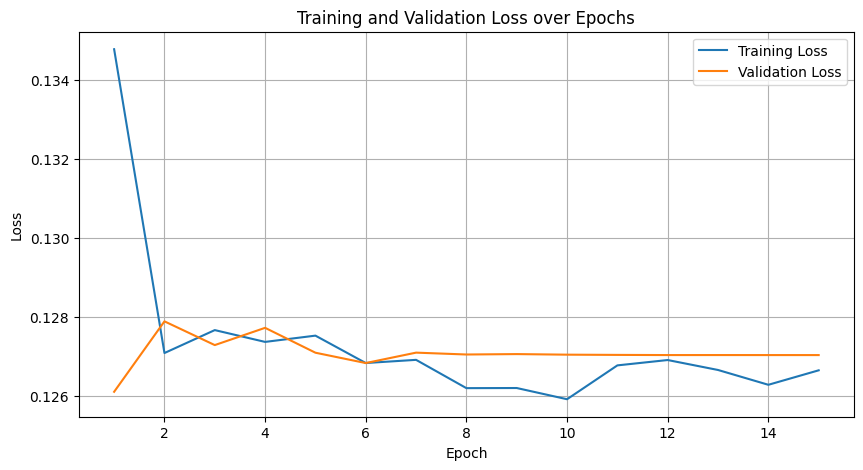

Training complete.


In [13]:
# --- Train Experiment 1 ---
# Ensure device is defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train using the shared function (Fresh model, standard hyperparameters)
siamese_model_1 = train_model(train_loader, val_loader, num_epochs=15, device=device)

### Evaluate with ROC AUC

Evaluating Model for ROC AUC...

Model ROC AUC Score: 0.5074


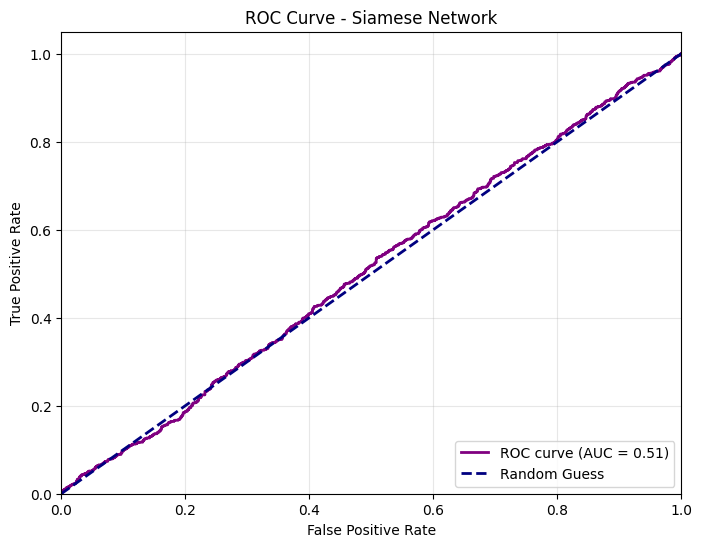


--- Evaluating on Common Test Set ---
Common Test Set ROC AUC: 0.5091


np.float64(0.5091373347123522)

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import torch.nn.functional as F
import numpy as np
import torch

# 1. Set model to evaluation mode
siamese_model_1.eval()

all_distances = []
all_labels = []

print("Evaluating Model for ROC AUC...")

# 2. Collect predictions
with torch.no_grad():
    for emb1, emb2, label in val_loader:
        emb1, emb2, label = emb1.to(device), emb2.to(device), label.to(device)

        # Get embeddings from the model
        out1, out2 = siamese_model_1(emb1, emb2)

        # Calculate Euclidean distance
        distances = F.pairwise_distance(out1, out2)

        # Store results
        all_distances.extend(distances.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

# 3. Prepare arrays
y_true = np.array(all_labels)
distances = np.array(all_distances)

# 4. Calculate Scores
# Smaller distance = Higher similarity
scores = -distances

# 5. Calculate ROC AUC
roc_auc = roc_auc_score(y_true, scores)
print(f"\nModel ROC AUC Score: {roc_auc:.4f}")

# 6. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Siamese Network')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# --- NEW: Evaluate on Common Test Set ---
evaluate_on_test_set(siamese_model_1, df_test_common, emb_test_common, device=device)

Optimal Similarity Threshold: -0.4913


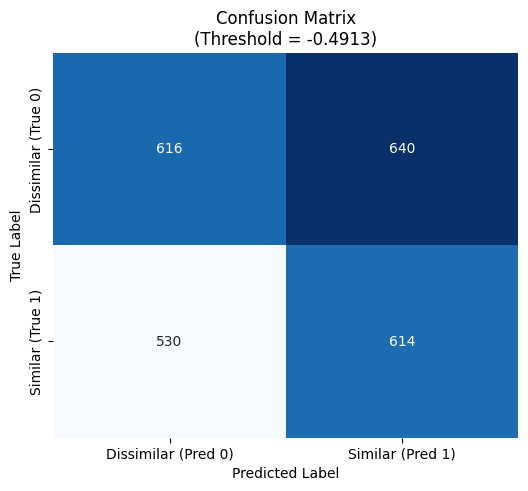

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Ensure predictions are available
if 'y_true' not in locals() or 'scores' not in locals():
    print("Generating predictions for confusion matrix...")
    siamese_model_1.eval()
    all_distances = []
    all_labels = []
    with torch.no_grad():
        for emb1, emb2, label in val_loader:
            emb1, emb2, label = emb1.to(device), emb2.to(device), label.to(device)
            out1, out2 = siamese_model_1(emb1, emb2)
            distances = F.pairwise_distance(out1, out2)
            all_distances.extend(distances.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
    y_true = np.array(all_labels)
    scores = -np.array(all_distances)

# 1. Find Optimal Threshold (Youden's J statistic)
fpr, tpr, thresholds = roc_curve(y_true, scores)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

print(f"Optimal Similarity Threshold: {best_thresh:.4f}")

# 2. Generate Binary Predictions
# Score = -Distance. Higher score = More Similar.
# If score >= threshold, predict 1 (Similar)
y_pred = (scores >= best_thresh).astype(int)

# 3. Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Visualize
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Dissimilar (Pred 0)', 'Similar (Pred 1)'],
            yticklabels=['Dissimilar (True 0)', 'Similar (True 1)'])
plt.title(f'Confusion Matrix\n(Threshold = {best_thresh:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Save the model checkpoint

## Experiment 2: 2 bins
Modify the data preparation logic to bin `df_sampled['y']` into two categories (median split) using `pd.qcut(q=2)`. Re-instantiate the `QuantilePairDataset` and DataLoaders. Retrain the Siamese Network with this new configuration, evaluate the performance using ROC AUC, and summarize the results of the 2-bin experiment.

### Data Prep with 2 Bins (Median Split)

In [16]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# 1. Median Split Binning on df_train_val
df_train_val['bin'] = pd.qcut(df_train_val['y'], q=2, labels=False)

print("Bin counts (Median Split, Train/Val Pool):")
print(df_train_val['bin'].value_counts())

# 2. Internal Split
train_df, val_df, train_emb, val_emb = train_test_split(
    df_train_val,
    emb_train_val,
    test_size=0.2,
    stratify=df_train_val['bin'],
    random_state=42
)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# 3. Create DataLoaders (Using Global Class)
train_dataset = QuantilePairDataset(train_df, train_emb, mode='train')
val_dataset = QuantilePairDataset(val_df, val_emb, mode='val')

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

print(f"\nTraining Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")

Bin counts (Median Split, Train/Val Pool):
bin
0    6000
1    6000
Name: count, dtype: int64

Training Dataset Size: 9600
Validation Dataset Size: 2400


**Reasoning**:
Re-initialize the Siamese Network, loss function, and optimizer, then train the model for 15 epochs using the newly created DataLoaders for the median-split task.



Starting training (lr=0.0001) for 15 epochs...
Epoch [1/15] | Train Loss: 0.134140 | Val Loss: 0.128658 | LR: 1.0e-04
Epoch [2/15] | Train Loss: 0.127735 | Val Loss: 0.129184 | LR: 1.0e-04
Epoch [3/15] | Train Loss: 0.128041 | Val Loss: 0.126866 | LR: 1.0e-04
Epoch [4/15] | Train Loss: 0.127570 | Val Loss: 0.128506 | LR: 1.0e-04
Epoch [5/15] | Train Loss: 0.127752 | Val Loss: 0.128014 | LR: 1.0e-04
Epoch [6/15] | Train Loss: 0.128178 | Val Loss: 0.128016 | LR: 1.0e-04
Epoch [7/15] | Train Loss: 0.126754 | Val Loss: 0.127887 | LR: 1.0e-05
Epoch [8/15] | Train Loss: 0.127445 | Val Loss: 0.127549 | LR: 1.0e-05
Epoch [9/15] | Train Loss: 0.127017 | Val Loss: 0.127343 | LR: 1.0e-05
Epoch [10/15] | Train Loss: 0.127279 | Val Loss: 0.127347 | LR: 1.0e-06
Epoch [11/15] | Train Loss: 0.126723 | Val Loss: 0.127364 | LR: 1.0e-06
Epoch [12/15] | Train Loss: 0.126649 | Val Loss: 0.127369 | LR: 1.0e-06
Epoch [13/15] | Train Loss: 0.127217 | Val Loss: 0.127372 | LR: 1.0e-07
Epoch [14/15] | Train Loss

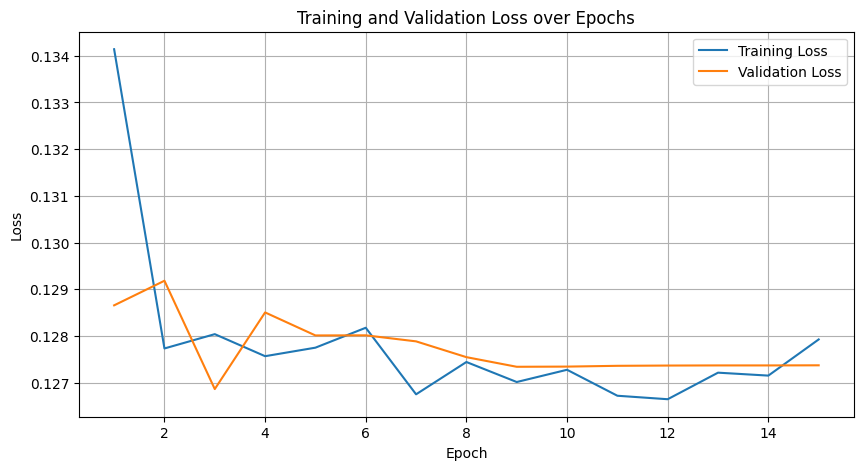

Training complete.


In [17]:
# --- Train Experiment 2 ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train using the shared function (Fresh model, standard hyperparameters)
siamese_model_2 = train_model(train_loader, val_loader, num_epochs=15, device=device)

**Reasoning**:
I will calculate the ROC AUC score and plot the ROC curve for the median-split experiment to evaluate the model's performance on this binary classification task.



Evaluating Median Split Model for ROC AUC...

Median Split ROC AUC Score: 0.5003


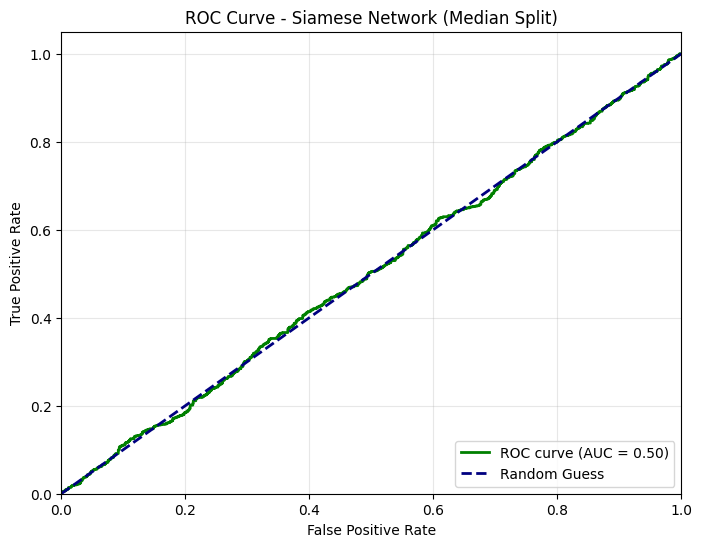


--- Evaluating on Common Test Set ---
Common Test Set ROC AUC: 0.5072


np.float64(0.507221832983018)

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import torch.nn.functional as F
import numpy as np
import torch

# 1. Set model to evaluation mode
siamese_model_2.eval()

all_distances = []
all_labels = []

print("Evaluating Median Split Model for ROC AUC...")

# 2. Collect predictions
with torch.no_grad():
    for emb1, emb2, label in val_loader:
        emb1, emb2, label = emb1.to(device), emb2.to(device), label.to(device)

        # Get embeddings from the model
        out1, out2 = siamese_model_2(emb1, emb2)

        # Calculate Euclidean distance
        distances = F.pairwise_distance(out1, out2)

        # Store results
        all_distances.extend(distances.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

# 3. Prepare arrays
y_true = np.array(all_labels)
distances = np.array(all_distances)

# 4. Calculate Scores
# Smaller distance = Higher similarity
scores = -distances

# 5. Calculate ROC AUC
roc_auc = roc_auc_score(y_true, scores)
print(f"\nMedian Split ROC AUC Score: {roc_auc:.4f}")

# 6. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Siamese Network (Median Split)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# --- NEW: Evaluate on Common Test Set ---
evaluate_on_test_set(siamese_model_2, df_test_common, emb_test_common, device=device)

## Experiment 3: 33/33/33 bins

### Data Prep with 33/33/33 bins

In [19]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# --- EXPERIMENT 3: 33/33/33 Split ---

# 1. Calculate Percentiles on df_train_val
q1 = df_train_val['y'].quantile(0.33)
q3 = df_train_val['y'].quantile(0.66)
print(f"Exp 3 (33/33/33) - 33rd: {q1:.6f}, 66th: {q3:.6f}")

# 2. Create 'bin' column
df_train_val['bin'] = df_train_val['y'].apply(lambda y: assign_bin(y, q1, q3))
print("\nBin counts (Train/Val Pool):")
print(df_train_val['bin'].value_counts())

# 3. Internal Split
# FIX: Use emb_train_val
train_df, val_df, train_emb, val_emb = train_test_split(
    df_train_val,
    emb_train_val,
    test_size=0.2,
    stratify=df_train_val['bin'],
    random_state=42
)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# 4. Instantiate Datasets (Using Global Class)
train_dataset = QuantilePairDataset(train_df, train_emb, mode='train')
val_dataset = QuantilePairDataset(val_df, val_emb, mode='val')

# 5. Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

print(f"\nExp 3 - Training Dataset Size: {len(train_dataset)}")
print(f"Exp 3 - Validation Dataset Size: {len(val_dataset)}")

Exp 3 (33/33/33) - 33rd: -0.001827, 66th: 0.025295

Bin counts (Train/Val Pool):
bin
2    4077
1    3965
0    3958
Name: count, dtype: int64

Exp 3 - Training Dataset Size: 9600
Exp 3 - Validation Dataset Size: 2400


### Train

Starting training (lr=0.0001) for 15 epochs...
Epoch [1/15] | Train Loss: 0.134312 | Val Loss: 0.127830 | LR: 1.0e-04
Epoch [2/15] | Train Loss: 0.128045 | Val Loss: 0.127373 | LR: 1.0e-04
Epoch [3/15] | Train Loss: 0.127757 | Val Loss: 0.129233 | LR: 1.0e-04
Epoch [4/15] | Train Loss: 0.128023 | Val Loss: 0.128951 | LR: 1.0e-04
Epoch [5/15] | Train Loss: 0.128111 | Val Loss: 0.126925 | LR: 1.0e-04
Epoch [6/15] | Train Loss: 0.127851 | Val Loss: 0.126339 | LR: 1.0e-04
Epoch [7/15] | Train Loss: 0.127617 | Val Loss: 0.127059 | LR: 1.0e-04
Epoch [8/15] | Train Loss: 0.127634 | Val Loss: 0.127201 | LR: 1.0e-04
Epoch [9/15] | Train Loss: 0.127340 | Val Loss: 0.128652 | LR: 1.0e-04
Epoch [10/15] | Train Loss: 0.127429 | Val Loss: 0.127280 | LR: 1.0e-05
Epoch [11/15] | Train Loss: 0.127441 | Val Loss: 0.127064 | LR: 1.0e-05
Epoch [12/15] | Train Loss: 0.127237 | Val Loss: 0.126981 | LR: 1.0e-05
Epoch [13/15] | Train Loss: 0.126595 | Val Loss: 0.126984 | LR: 1.0e-06
Epoch [14/15] | Train Loss

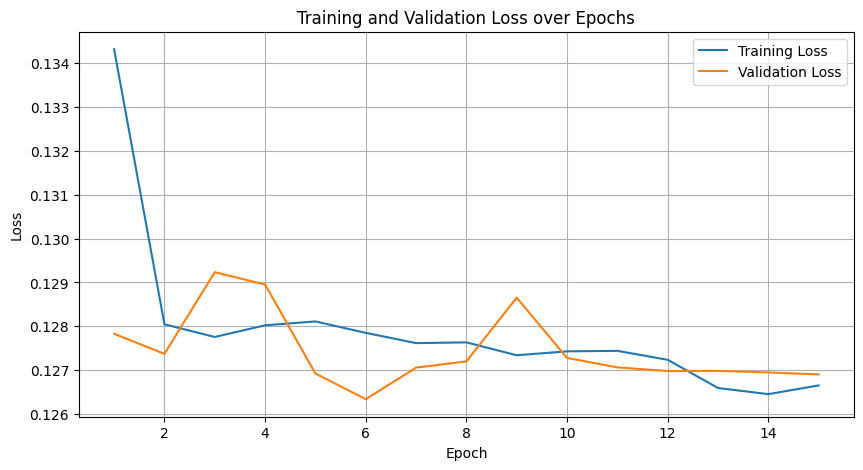

Training complete.


In [20]:
# --- Train Experiment 3 ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train using the shared function (Fresh model, standard hyperparameters)
siamese_model_3 = train_model(train_loader, val_loader, num_epochs=15, device=device)

### Evaluation

Evaluating Model for ROC AUC...

Model ROC AUC Score: 0.5002


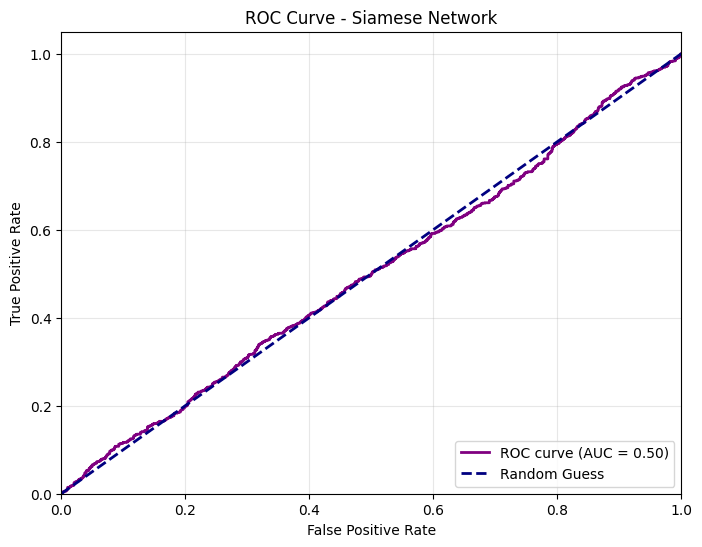


--- Evaluating on Common Test Set ---
Common Test Set ROC AUC: 0.4835


np.float64(0.48348446935575357)

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import torch.nn.functional as F
import numpy as np
import torch

# 1. Set model to evaluation mode
siamese_model_3.eval()

all_distances = []
all_labels = []

print("Evaluating Model for ROC AUC...")

# 2. Collect predictions
with torch.no_grad():
    for emb1, emb2, label in val_loader:
        emb1, emb2, label = emb1.to(device), emb2.to(device), label.to(device)

        # Get embeddings from the model
        out1, out2 = siamese_model_3(emb1, emb2)

        # Calculate Euclidean distance
        distances = F.pairwise_distance(out1, out2)

        # Store results
        all_distances.extend(distances.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

# 3. Prepare arrays
y_true = np.array(all_labels)
distances = np.array(all_distances)

# 4. Calculate Scores
# Smaller distance = Higher similarity
scores = -distances

# 5. Calculate ROC AUC
roc_auc = roc_auc_score(y_true, scores)
print(f"\nModel ROC AUC Score: {roc_auc:.4f}")

# 6. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Siamese Network')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# --- NEW: Evaluate on Common Test Set ---
evaluate_on_test_set(siamese_model_3, df_test_common, emb_test_common, device=device)

Optimal Similarity Threshold: -0.5732


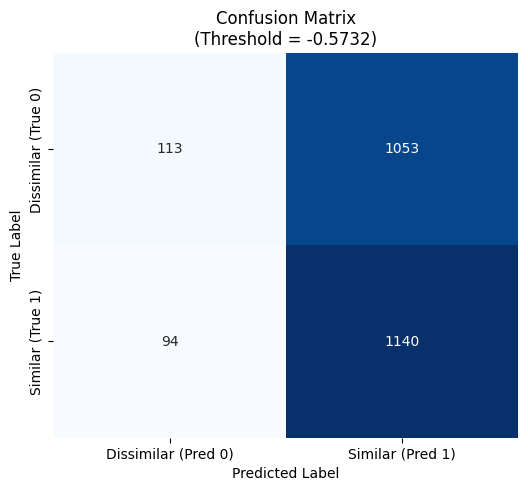

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Ensure predictions are available
if 'y_true' not in locals() or 'scores' not in locals():
    print("Generating predictions for confusion matrix...")
    siamese_model_3.eval()
    all_distances = []
    all_labels = []
    with torch.no_grad():
        for emb1, emb2, label in val_loader:
            emb1, emb2, label = emb1.to(device), emb2.to(device), label.to(device)
            out1, out2 = siamese_model_3(emb1, emb2)
            distances = F.pairwise_distance(out1, out2)
            all_distances.extend(distances.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
    y_true = np.array(all_labels)
    scores = -np.array(all_distances)

# 1. Find Optimal Threshold (Youden's J statistic)
fpr, tpr, thresholds = roc_curve(y_true, scores)
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

print(f"Optimal Similarity Threshold: {best_thresh:.4f}")

# 2. Generate Binary Predictions
# Score = -Distance. Higher score = More Similar.
# If score >= threshold, predict 1 (Similar)
y_pred = (scores >= best_thresh).astype(int)

# 3. Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Visualize
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Dissimilar (Pred 0)', 'Similar (Pred 1)'],
            yticklabels=['Dissimilar (True 0)', 'Similar (True 1)'])
plt.title(f'Confusion Matrix\n(Threshold = {best_thresh:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Save model checkpoints

In [35]:
import torch
import os

# Define the models and their target filenames
models_to_save = {
    'siamese_model_1': 'siamese_model_1.pth',
    'siamese_model_2': 'siamese_model_2.pth',
    'siamese_model_3': 'siamese_model_3.pth'
}

print("Saving model checkpoints...")

for model_name, filename in models_to_save.items():
    # Check if the model variable exists in the global scope
    if model_name in globals():
        model = globals()[model_name]
        torch.save(model.state_dict(), filename)
        print(f"✅ Saved {model_name} to '{filename}'")
    else:
        print(f"⚠️ {model_name} not found in environment. Skipping.")

Saving model checkpoints...
✅ Saved siamese_model_1 to 'siamese_model_1.pth'
✅ Saved siamese_model_2 to 'siamese_model_2.pth'
✅ Saved siamese_model_3 to 'siamese_model_3.pth'


# A-Sen-Emb-Transformer

## Data processing

### Read price data from AWS

In [24]:
df_news_top5 = None
df_stocks_top5 = None

SQL_QUERY_NEWS = "SELECT * FROM fnspid_nasdaq_news_top5_summaries"
SQL_QUERY_STOCKS = "SELECT * FROM fnspid_stock_prices_top5"

try:
    # Create a boto3 session with the provided credentials
    session = boto3.Session(
        aws_access_key_id=aws_access_key_id,
        aws_secret_access_key=aws_secret_access_key,
        region_name=AWS_REGION,
    )

    df_news_top5 = wr.athena.read_sql_query(
        sql=SQL_QUERY_NEWS,
        database=ATHENA_DB,
        s3_output=S3_STAGING_DIR,
        boto3_session=session,
    )

    print(df_news_top5.head())

    df_stocks_top5 = wr.athena.read_sql_query(
        sql=SQL_QUERY_STOCKS,
        database=ATHENA_DB,
        s3_output=S3_STAGING_DIR,
        boto3_session=session,
    )

    print(df_stocks_top5.head())

    print("\nQuery successful! Data loaded into DataFrame.")

except Exception as e:
    print(f"\nAn error occurred:")
    print(e)

   timestamp                                      article_title stock_symbol  \
0 2023-06-29  GLOBAL MARKETS-Stocks in the summer swing, yen...         AAPL   
1 2023-06-29  US STOCKS-Wall St set to rise as banks gain, e...         AAPL   
2 2023-06-29  2 Cruise Stocks Boosting the S&P 500 Rally in ...         AAPL   
3 2023-06-29  Google Was Just Downgraded, But This Could Be ...         AAPL   
4 2023-06-29  GLOBAL MARKETS-Stocks shrug off inflation angs...         AAPL   

                                                 url publisher author  \
0  https://www.nasdaq.com/articles/global-markets...                    
1  https://www.nasdaq.com/articles/us-stocks-wall...                    
2  https://www.nasdaq.com/articles/2-cruise-stock...                    
3  https://www.nasdaq.com/articles/google-was-jus...                    
4  https://www.nasdaq.com/articles/global-markets...                    

                                             article  \
0  By Marc Jones LONDON,

### Process stock prices

In [25]:
df = df_stocks_top5.copy()
df['date'] = pd.to_datetime(df['date']).dt.normalize()

In [26]:
# Helper function to create sequences
def create_sequences(features, target, lookback=50, horizon=3):
    X, y = [], []
    # We create sequences of length 'lookback'
    # The target is 'horizon' steps after the sequence ends
    # Sequence ends at index i + lookback - 1
    # Target index is (i + lookback - 1) + horizon
    for i in range(len(features) - lookback - horizon + 1):
        X.append(features[i : i + lookback])
        y.append(target[i + lookback + horizon - 1])
    return np.array(X), np.array(y)

print("Helper function 'create_sequences' defined.")
# The actual data generation loop has been moved to the Sentiment Fusion section
# to avoid doing the work twice.

Helper function 'create_sequences' defined.


### Extract Siamese embeddings

In [27]:
import pandas as pd
import torch
import os

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "gpu")
print(f"Using device: {device}")

# 1. Load the FinBERT embeddings from CSV
# User states 'sentiment_embeddings.csv' contains the FinBERT embeddings (Inputs)
filename = 'sentiment_embeddings.csv'
if not os.path.exists(filename):
    raise FileNotFoundError(f"The file '{filename}' was not found. Please upload it.")

print(f"Loading FinBERT embeddings from '{filename}'...")
df_finbert = pd.read_csv(filename)
print(f"Loaded DataFrame shape: {df_finbert.shape}")

# 2. Identify Embedding Columns
# Headings are stock_symbol, date, 0...767
# We generate the list of numeric column names as strings
finbert_cols = [str(i) for i in range(768)]

# Verify these columns exist
missing_cols = [c for c in finbert_cols if c not in df_finbert.columns]
if missing_cols:
    raise ValueError(f"Missing expected embedding columns in CSV: {missing_cols[:5]}...")

print(f"Identified {len(finbert_cols)} embedding columns (0-767).")

# Ensure 'date' is present and normalized for aggregation
if 'date' not in df_finbert.columns:
    if 'timestamp' in df_finbert.columns:
        df_finbert['date'] = pd.to_datetime(df_finbert['timestamp']).dt.normalize()
    else:
        print("⚠️ WARNING: 'date' column missing. Aggregation by date might fail.")
else:
    df_finbert['date'] = pd.to_datetime(df_finbert['date']).dt.normalize()

# 3. Project using Siamese Model
if 'siamese_model_3' not in globals():
    raise ValueError("Siamese 'siamese_model_3' variable is not defined. Please run the training cells.")

siamese_model_3.to(device)
siamese_model_3.eval()

# Convert FinBERT embeddings to Tensor
print("Converting data to tensor...")
finbert_tensor = torch.tensor(df_finbert[finbert_cols].values, dtype=torch.float32)

# Project in batches (MLP projection is fast, using large batch)
batch_size = 4096
all_projections = []

print(f"Projecting {len(finbert_tensor)} embeddings...")

with torch.no_grad():
    for i in range(0, len(finbert_tensor), batch_size):
        batch = finbert_tensor[i : i + batch_size].to(device)
        # Forward pass (forward_once for single input)
        projections = siamese_model_3.forward_once(batch)
        all_projections.append(projections.cpu())

siamese_tensor = torch.cat(all_projections, dim=0)

# 4. Create Output DataFrame with Siamese Projections
# New columns for 64-dim embeddings
embedding_dim = siamese_tensor.shape[1]
siamese_cols = [f'emb_{i}' for i in range(embedding_dim)]

df_siamese = pd.DataFrame(siamese_tensor.numpy(), columns=siamese_cols)

# Attach metadata for aggregation
df_siamese['stock_symbol'] = df_finbert['stock_symbol'].values
df_siamese['date'] = df_finbert['date'].values

# 5. Aggregate (Mean per Stock/Date)
print("Aggregating by stock_symbol and date...")
siamese_embeddings = df_siamese.groupby(['stock_symbol', 'date'])[siamese_cols].mean().reset_index()

print(f"\nFinal Siamese Embeddings Shape: {siamese_embeddings.shape}")
print(siamese_embeddings.head())

Using device: cuda
Loading FinBERT embeddings from 'sentiment_embeddings.csv'...
Loaded DataFrame shape: (3922, 770)
Identified 768 embedding columns (0-767).
Converting data to tensor...
Projecting 3922 embeddings...
Aggregating by stock_symbol and date...

Final Siamese Embeddings Shape: (3922, 66)
  stock_symbol       date     emb_0     emb_1     emb_2     emb_3     emb_4  \
0         AAPL 2022-06-03  0.004275 -0.011023  0.036457  0.080015  0.099981   
1         AAPL 2022-06-04 -0.009739 -0.088482  0.122724  0.078647  0.085845   
2         AAPL 2022-06-05 -0.010643 -0.044588  0.050749  0.033654  0.067713   
3         AAPL 2022-06-06 -0.016412 -0.019867  0.043582  0.057140  0.104436   
4         AAPL 2022-06-07 -0.037439 -0.022901  0.048442  0.058832  0.081585   

      emb_5     emb_6     emb_7  ...    emb_54    emb_55    emb_56    emb_57  \
0 -0.010609 -0.020112  0.073414  ...  0.002941  0.000940 -0.021595 -0.054367   
1  0.019009 -0.088264 -0.007602  ... -0.066616 -0.016137  0.081

### Merge embeddings with prices

In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

lookback = 50
horizon = 3

# 1. Prepare Embeddings
# Rename columns to ensure they are distinct strings and avoid conflict
embedding_cols = [col for col in siamese_embeddings.columns if col not in ['stock_symbol', 'date']]
new_col_names = {col: f"emb_{col}" for col in embedding_cols}
siamese_embeddings_renamed = siamese_embeddings.rename(columns=new_col_names)
embedding_feature_names = list(new_col_names.values())

# 2. Merge with Stock Data
# Ensure 'date' column in df is datetime and normalized
df['date'] = pd.to_datetime(df['date']).dt.normalize()

# Merge on stock_symbol and date (Left Join to keep all stock data)
merged_df = pd.merge(df, siamese_embeddings_renamed, on=['stock_symbol', 'date'], how='left')

# 3. Impute Missing Embeddings
print("Imputing missing embeddings (Forward Fill then Zero Fill)...")
# Forward fill embeddings per stock to persist sentiment
merged_df[embedding_feature_names] = merged_df.groupby('stock_symbol')[embedding_feature_names].ffill()
# Fill remaining NaNs (e.g., beginning of history) with 0.0
merged_df[embedding_feature_names] = merged_df[embedding_feature_names].fillna(0.0)

# 4. Setup for Sequence Generation
print("Generating sequences with strict Train/Test split...")
X_train_all, y_train_all = [], []
X_test_all, y_test_all = [], []
scalers = {}

price_features = ['open', 'close', 'volume']

for symbol, group in merged_df.groupby('stock_symbol'):
    # Sort by date just in case
    group = group.sort_values('date')

    # a. Extract features
    # Price features (to be scaled)
    raw_prices = group[price_features].values
    # Embedding features (already normalized/frozen, we keep them as is)
    raw_embeddings = group[embedding_feature_names].values

    # Skip if too short
    if len(raw_prices) < (lookback + horizon + 1):
        continue

    # b. Split raw data (80% Train, 20% Test)
    split_idx = int(len(raw_prices) * 0.8)

    train_prices = raw_prices[:split_idx]
    test_prices = raw_prices[split_idx:]

    train_embeddings = raw_embeddings[:split_idx]
    test_embeddings = raw_embeddings[split_idx:]

    # c. Scaling (Fit on Train, Transform on Test)
    scaler = MinMaxScaler()
    train_prices_scaled = scaler.fit_transform(train_prices)
    test_prices_scaled = scaler.transform(test_prices)

    # Store scaler
    scalers[symbol] = scaler

    # d. Combine Features (Prices + Embeddings)
    # We assume embeddings are features, not targets
    train_features = np.hstack([train_prices_scaled, train_embeddings])
    test_features = np.hstack([test_prices_scaled, test_embeddings])

    # e. Define Targets (Predicting 'Close' price, which is index 1 in price_features)
    train_target = train_prices_scaled[:, 1]
    test_target = test_prices_scaled[:, 1]

    # f. Create Sequences
    X_tr, y_tr = create_sequences(train_features, train_target, lookback, horizon)
    X_te, y_te = create_sequences(test_features, test_target, lookback, horizon)

    if len(X_tr) > 0:
        X_train_all.append(X_tr)
        y_train_all.append(y_tr)
    if len(X_te) > 0:
        X_test_all.append(X_te)
        y_test_all.append(y_te)

# 5. Concatenate
if X_train_all:
    X_train = np.concatenate(X_train_all, axis=0)
    y_train = np.concatenate(y_train_all, axis=0)
    X_test = np.concatenate(X_test_all, axis=0)
    y_test = np.concatenate(y_test_all, axis=0)
else:
    raise ValueError("No sequences generated. Check data length and sequence parameters.")

print(f"\nProcessing Complete.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Input Feature Dimension: {X_train.shape[2]}")

Imputing missing embeddings (Forward Fill then Zero Fill)...
Generating sequences with strict Train/Test split...

Processing Complete.
X_train shape: (30320, 50, 67), y_train shape: (30320,)
X_test shape: (7387, 50, 67), y_test shape: (7387,)
Input Feature Dimension: 67


## Define the Transformer model

In [29]:
import torch
import torch.nn as nn
import math
import torch.compiler._cache

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x shape: (batch, seq_len, d_model)
        return x + self.pe[:, :x.size(1), :]

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, d_model, num_heads, num_layers, output_dim, dropout=0.2, dim_feedforward=128):
        super(TimeSeriesTransformer, self).__init__()
        self.d_model = d_model

        # Input Projection
        self.input_projection = nn.Linear(input_dim, d_model)
        self.activation = nn.ReLU()

        # Positional Encoding
        self.pos_encoder = PositionalEncoding(d_model)
        self.pos_dropout = nn.Dropout(dropout)

        # Transformer Encoder
        # Pre-LN configuration
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=num_heads,
            batch_first=True,
            dropout=dropout,
            dim_feedforward=dim_feedforward,
            norm_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Decoder / Output Layer
        self.decoder = nn.Linear(d_model, output_dim)

    def forward(self, x):
        # x shape: (batch, seq_len, input_dim)

        # Project and Scale
        x = self.input_projection(x) * math.sqrt(self.d_model)
        x = self.activation(x)

        # Add Positional Encoding
        x = self.pos_encoder(x)
        x = self.pos_dropout(x)

        # Transformer Encoder
        x = self.transformer_encoder(x)

        # Select last time step
        x = x[:, -1, :]

        # Output
        x = self.decoder(x)
        return x

print("Model class 'TimeSeriesTransformer' defined successfully.")

Model class 'TimeSeriesTransformer' defined successfully.


## Train the model

Using device: cuda
Starting training for 100 epochs...


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


Epoch [1/100] | Train Loss: 0.017899 | Test Loss: 1.815049
Epoch [2/100] | Train Loss: 0.002922 | Test Loss: 1.608446
Epoch [3/100] | Train Loss: 0.001809 | Test Loss: 1.593024
Epoch [4/100] | Train Loss: 0.001445 | Test Loss: 1.636677
Epoch [5/100] | Train Loss: 0.001156 | Test Loss: 1.559046
Epoch [6/100] | Train Loss: 0.000987 | Test Loss: 1.431483
Epoch [7/100] | Train Loss: 0.000884 | Test Loss: 1.478018
Epoch [8/100] | Train Loss: 0.000794 | Test Loss: 1.415827
Epoch [9/100] | Train Loss: 0.000708 | Test Loss: 1.387401
Epoch [10/100] | Train Loss: 0.000633 | Test Loss: 1.245678
Epoch [11/100] | Train Loss: 0.000586 | Test Loss: 1.159067
Epoch [12/100] | Train Loss: 0.000524 | Test Loss: 1.148779
Epoch [13/100] | Train Loss: 0.000486 | Test Loss: 1.052016
Epoch [14/100] | Train Loss: 0.000438 | Test Loss: 1.060865
Epoch [15/100] | Train Loss: 0.000413 | Test Loss: 0.860589
Epoch [16/100] | Train Loss: 0.000370 | Test Loss: 0.948602
Epoch [17/100] | Train Loss: 0.000356 | Test Loss

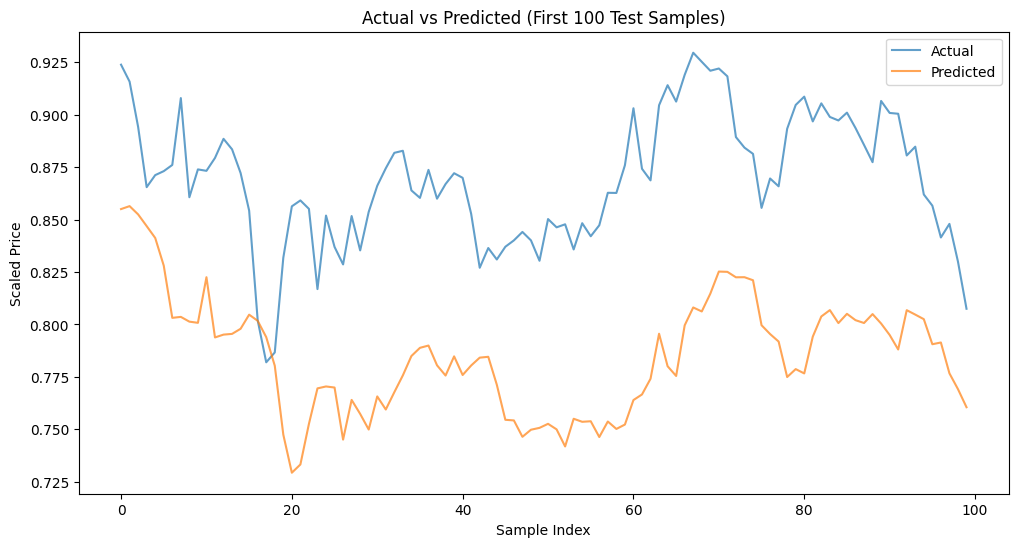

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sys

# 1. Convert to PyTorch Tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Ensure data is float32
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Shape (N, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)    # Shape (N, 1)

# 2. Create DataLoaders
BATCH_SIZE = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 3. Instantiate Model
input_dim = X_train.shape[2]  # Should be 67
d_model = 32
num_heads = 4
num_layers = 4
output_dim = 1

# Ensure TimeSeriesTransformer is defined (from previous cell)
if 'TimeSeriesTransformer' not in globals():
    raise NameError("TimeSeriesTransformer class is not defined. Please run the previous cell.")

model = TimeSeriesTransformer(
    input_dim=input_dim,
    d_model=d_model,
    num_heads=num_heads,
    num_layers=num_layers,
    output_dim=output_dim,
    dropout=0.2
).to(device)

# 4. Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

# 5. Training Loop
num_epochs = 100
train_losses = []
test_losses = []

print(f"Starting training for {num_epochs} epochs...")

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * X_batch.size(0)

    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Evaluation Phase
    model.eval()
    running_test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_test_loss += loss.item() * X_batch.size(0)

    epoch_test_loss = running_test_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Train Loss: {epoch_train_loss:.6f} | Test Loss: {epoch_test_loss:.6f}")

## Evaluate the model

In [ ]:
# 6. Evaluation Metrics
model.eval()
with torch.no_grad():
    test_predictions = []
    test_targets = []
    last_known_prices = [] # Store last known price for directional accuracy
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        preds = model(X_batch).cpu().numpy()
        test_predictions.extend(preds)
        test_targets.extend(y_batch.numpy())

        # Extract the last known 'Close' price from the input sequence
        # Feature index 1 corresponds to 'Close' in our preprocessing
        # X_batch shape: (batch, seq_len, features)
        last_known_prices.extend(X_batch[:, -1, 1].cpu().numpy())

test_predictions = np.array(test_predictions).flatten()
test_targets = np.array(test_targets).flatten()
last_known_prices = np.array(last_known_prices).flatten()

mse = mean_squared_error(test_targets, test_predictions)
mae = mean_absolute_error(test_targets, test_predictions)
r2 = r2_score(test_targets, test_predictions)

# Directional Accuracy Calculation
# Calculate movement: Target - Last_Known_Price
actual_moves = np.sign(test_targets - last_known_prices)
pred_moves = np.sign(test_predictions - last_known_prices)

# Accuracy: Fraction of times the predicted direction matches the actual direction
dir_accuracy = np.mean(actual_moves == pred_moves)

print("\nFinal Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R2 Score: {r2:.6f}")

# 7. Plot Results (Subset for clarity)
plt.figure(figsize=(12, 6))
plt.plot(test_targets[:100], label='Actual', alpha=0.7)
plt.plot(test_predictions[:100], label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted (First 100 Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

--- De-Biased 'Relative Delta' Strategy ---
Total Market Return (Trimmed): 878.0000
Total Strategy Return (Relative): -50.0000
New Directional Accuracy: 49.58%

RESULT: Still underperforming. The model might just be outputting noise.


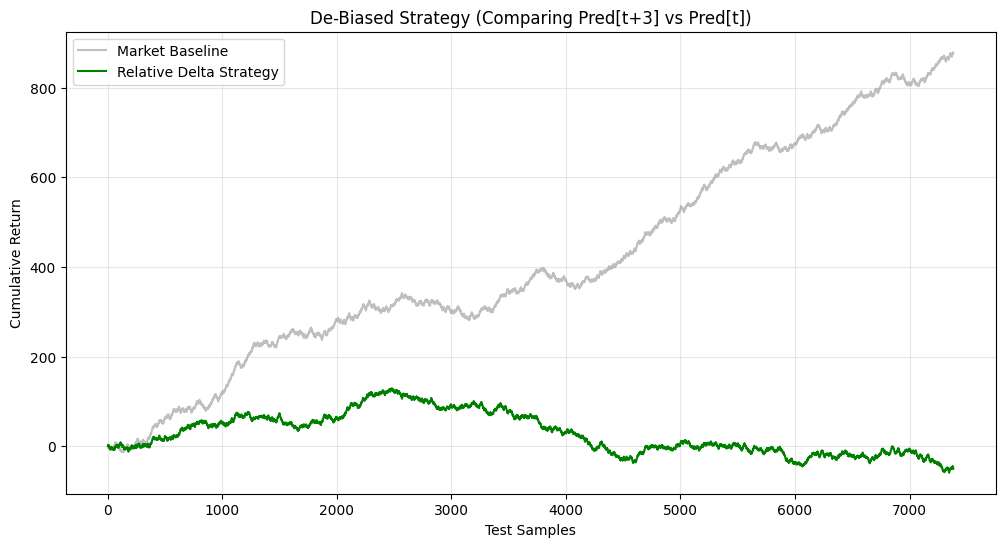

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
H = horizon  # 3

# 1. Align Predictions (Compare Pred[t] vs Pred[t-H])
# We lose the first H data points because we don't have a 'previous prediction' for them.
pred_future = test_predictions[H:]      # Prediction for T+3 (made at T)
pred_past   = test_predictions[:-H]     # Prediction for T   (made at T-3)

# 2. Generate Signal
# If Future Prediction > Past Prediction -> Model expects growth relative to its own baseline
relative_signal = np.sign(pred_future - pred_past)

# 3. Align Actual Moves
# We need the actual market moves corresponding to 'pred_future'
# actual_diff is (Target - Last_Known), aligned with test_predictions.
actual_moves_aligned = actual_moves[H:]

# 4. Calculate Returns
# Market Baseline (Buy and Hold) for this trimmed period
market_pnl_trimmed = actual_moves_aligned

# Strategy PnL
strategy_pnl_relative = relative_signal * actual_moves_aligned

# 5. Metrics
total_market_return_trim = np.sum(market_pnl_trimmed)
total_strategy_return_rel = np.sum(strategy_pnl_relative)

# Directional Accuracy of this new signal
# Check if the relative signal matched the actual market direction
actual_direction_trimmed = np.sign(actual_moves_aligned)
new_dir_accuracy = np.mean(relative_signal == actual_direction_trimmed)

print(f"--- De-Biased 'Relative Delta' Strategy ---")
print(f"Total Market Return (Trimmed): {total_market_return_trim:.4f}")
print(f"Total Strategy Return (Relative): {total_strategy_return_rel:.4f}")
print(f"New Directional Accuracy: {new_dir_accuracy:.2%}")

if total_strategy_return_rel > total_market_return_trim:
    print("\nRESULT: SUCCESS! The relative strategy OUTPERFORMS the market. The model has hidden alpha!")
else:
    print("\nRESULT: Still underperforming. The model might just be outputting noise.")

# 6. Visualize
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(market_pnl_trimmed), label='Market Baseline', color='gray', alpha=0.5)
plt.plot(np.cumsum(strategy_pnl_relative), label='Relative Delta Strategy', color='green')
plt.title(f'De-Biased Strategy (Comparing Pred[t+{H}] vs Pred[t])')
plt.xlabel('Test Samples')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Save model checkpoint

In [36]:
import torch

if 'model' in globals():
    torch.save(model.state_dict(), 'transformer_model.pth')
    print("✅ Saved 'model' to 'transformer_model.pth'")
else:
    print("⚠️ 'model' variable not found.")

✅ Saved 'model' to 'transformer_model.pth'
